# Statistical Thinking in Python

This notebook is inspired by the DataCamp Courses

* [Statistical Thinking (Part 1)](https://learn.datacamp.com/courses/statistical-thinking-in-python-part-1)
* [Statistical Thinking (Part 2)](https://learn.datacamp.com/courses/statistical-thinking-in-python-part-2)

Hacker stats toolbox to perform the two key tasks in statistical inference, parameter estimation and hypothesis testing

PMF, PDF, CDF

A probability distribution that describes your data has parameters.

## Table of Contents

0. [Data](#0)
1. [Graphical exploratory data analysis](#1._Graphical_exploratory_data_analysis)
1. a
1. a
1. a
5. [Parameter estimation by optimization](#5)
6. [Bootstrap confidence intervals](#6)
7. Inroduction to hypothesis testing
8. Hypothesis test eample
9. Case study



## Data<a id="0"></a>

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (16,9) # set the default plot size
sns.set() # set default seaborn style

Load iris data set from scikit-learn package https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [75]:
# Load and return the iris dataset (classification)

from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [76]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [77]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [78]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [79]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [80]:
# to-do: when would this be useful
# tuple if return_X_y is True
# data = load_iris(return_X_y=True)

In [81]:
df = iris.data
df.index  = iris.target_names[iris.target] # map target names to target and replace index
df.index.name = 'species'
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2
...,...,...,...,...
virginica,6.7,3.0,5.2,2.3
virginica,6.3,2.5,5.0,1.9
virginica,6.5,3.0,5.2,2.0


In [82]:
setosa_petal_length = df.loc['setosa', 'petal length (cm)'].values
versicolor_petal_length = df.loc['versicolor','petal length (cm)'].values
virginica_petal_length = df.loc['virginica', 'petal length (cm)'].values
versicolor_petal_length

array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
       4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
       4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
       4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1])

In [83]:
versicolor_petal_width =df.loc['versicolor', 'petal width (cm)'].values

## 1. Graphical exploratory data analysis<a id="1._Graphical_exploratory_data_analysis"></a>

Why do we do Exploratiory Analysis?

"Exploratory data analysis can never be the
whole story, but nothing else can serve as the
foundation stone.” — John Tukey

The importance of EDA: Anscombe's quartet

<img src='https://upload.wikimedia.org/wikipedia/commons/b/b6/Anscombe.svg'/>


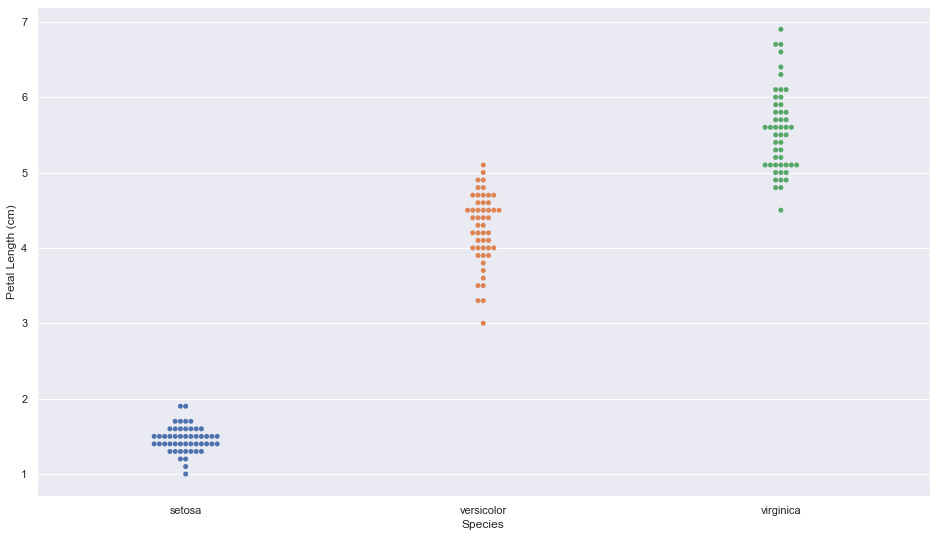

In [90]:
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(data = df, x=df.index , y='petal length (cm)')

# Label the axes
plt.xlabel('Species'); plt.ylabel('Petal Length (cm)')

# Show the plot
plt.show()

In [87]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

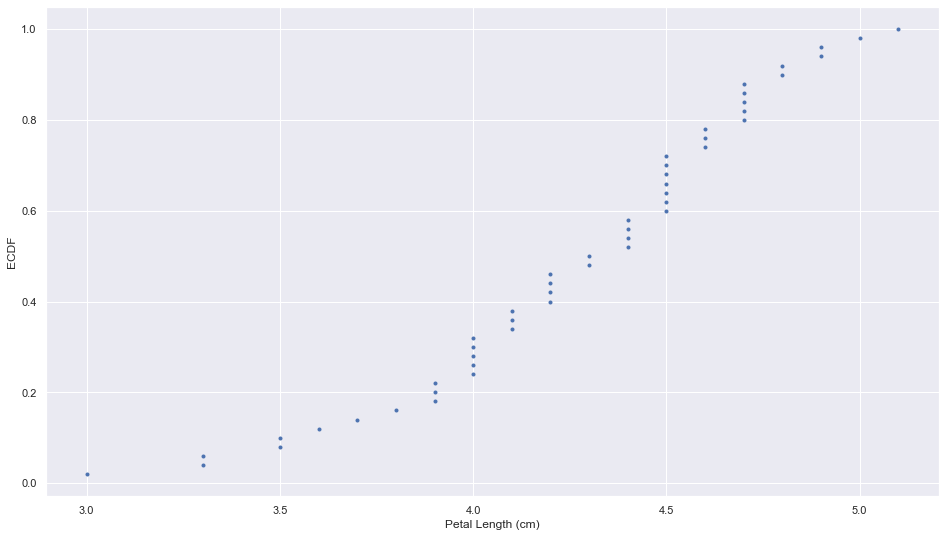

In [88]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Label the axes
plt.xlabel('Petal Length (cm)')
plt.ylabel('ECDF')

# Display the plot
plt.show()

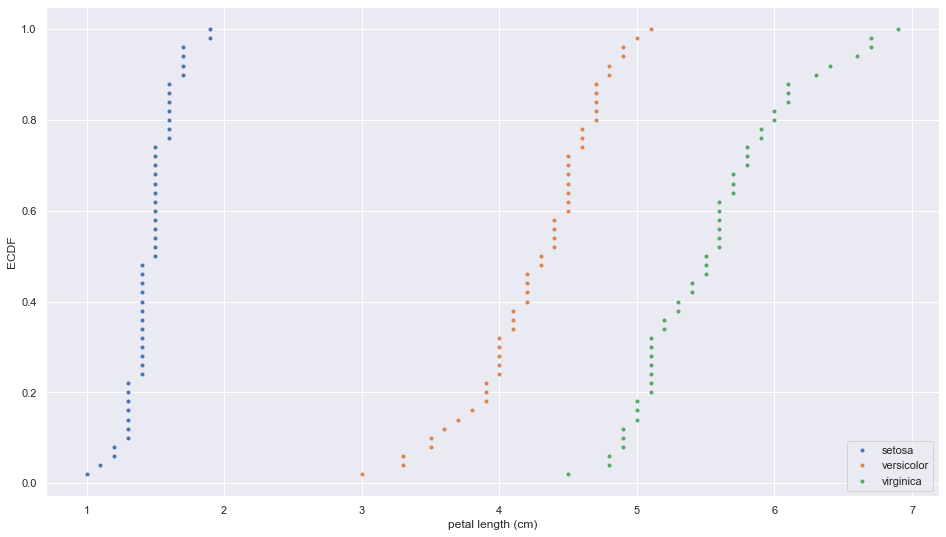

In [89]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

## 2. Quantitative exploratory data analysis

In [15]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


### Comparing percentiles to ECDF

N.b. To ensure the Y-axis of the ECDF plot remains between 0 and 1, the percentiles array needs to be rescaled accordingly - in this case, dividing it by 100.

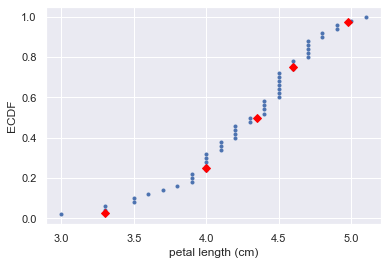

In [16]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

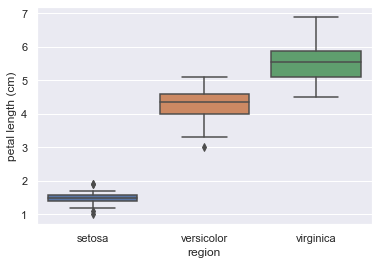

In [17]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x=df.index, y='petal length (cm)', data=df)

# Label the axes
_ = plt.xlabel('region')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

### Variance

In [18]:
# Array of differences to mean: differences
differences = versicolor_petal_length - versicolor_petal_length.mean()

# Square the differences: diff_sq
diff_sq = differences ** 2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)


0.21640000000000004 0.21640000000000004


### The standard deviation and the variance

In [19]:
# Compute the variance: variance
variance = versicolor_petal_length.var()

# Print the square root of the variance
print(variance ** 0.5)

# Print the standard deviation
print(versicolor_petal_length.std())

0.4651881339845203
0.4651881339845203


### Scatter plots

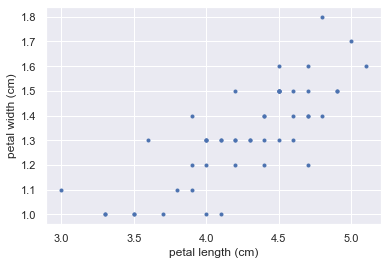

In [20]:
# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('petal width (cm)')

# Show the result
plt.show()

### Covariance

The covariance may be computed using the Numpy function `np.cov()`. For example, we have two sets of data `x` and `y`, `np.cov(x, y)` returns a 2D array where entries `[0,1]` and `[1,0]` are the covariances. Entry `[0,0]` is the variance of the data in `x`, and entry `[1,1]` is the variance of the data in `y`. This 2D output array is called the **covariance matrix**, since it organizes the self- and covariance.

In [21]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
# N.b. By symmetry, entry [1,0] is the same as entry [0,1].
petal_cov = covariance_matrix[0, 1]

# Print the length/width covariance
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


### Computing the Pearson correlation coefficient

The Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance. It is computed using the `np.corrcoef()` function. Like `np.cov()`, it takes two arrays as arguments and returns a 2D array. Entries `[0,0]` and `[1,1]` are necessarily equal to 1 (can you think about why?), and the value we are after is entry `[0,1]`.

In [22]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169


## Thinking probabilistically -- Discrete variables

Statistical inference rests upon probability. Because we can very rarely say anything meaningful with absolute certainty from data, we use probabilistic language to make quantitative statements about data. In this chapter, you will learn how to think probabilistically about discrete quantities: those that can only take certain values, like integers.

### Generating random numbers using the np.random module

We will be hammering the `np.random` module for the rest of this course and its sequel. Actually, you will probably call functions from this module more than any other while wearing your hacker statistician hat. Let's start by taking its simplest function, `np.random.random()` for a test spin. The function returns a random number between zero and one. Call `np.random.random()` a few times in the IPython shell. You should see numbers jumping around between zero and one.

In this exercise, we'll generate lots of random numbers between zero and one, and then plot a histogram of the results. If the numbers are truly random, all bars in the histogram should be of (close to) equal height.

You may have noticed that, in the video, Justin generated 4 random numbers by passing the keyword argument `size=4` to `np.random.random()`. Such an approach is more efficient than a `for` loop: in this exercise, however, you will write a `for` loop to experience hacker statistics as the practice of repeating an experiment over and over again.

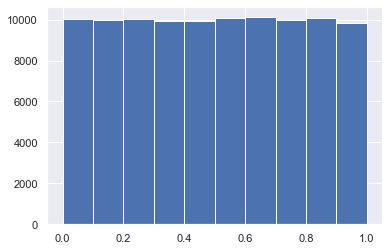

In [23]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

In [24]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

### How many defaults might we expect?
Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the perform_bernoulli_trials() function you wrote in the previous exercise and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

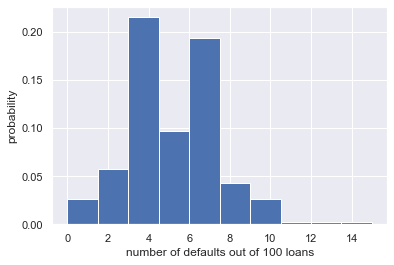

In [25]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, .05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density=True) # density = True; return probablity instead of count
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

### Will the bank fail?
Plot the number of defaults you got from the previous exercise, in your namespace as n_defaults, as a CDF. The ecdf() function you wrote in the first chapter is available.

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

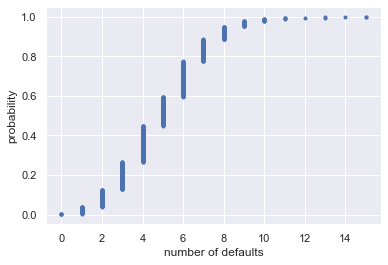

Probability of losing money = 0.022


In [26]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


Compute the total number of entries in your n_defaults array that were greater than or equal to 10. To do so, compute a boolean array that tells you whether a given entry of n_defaults is >= 10. Then sum all the entries in this array using np.sum(). For example, np.sum(n_defaults <= 5) would compute the number of defaults with 5 or fewer defaults.
The probability that the bank loses money is the fraction of n_defaults that are greater than or equal to 10. Print this result by hitting 'Submit Answer'!


As we might expect, we most likely get 5/100 defaults. But we still have about a 2% chance of getting 10 or more defaults out of 100 loans.

### Plotting the Binomial PMF as a histogram

The trick is setting up the edges of the bins to pass to `plt.hist()` via the bins keyword argument. We want the bins centered on the integers. So, the edges of the bins should be `-0.5, 0.5, 1.5, 2.5, ...` up to `max(n_defaults) + 1.5`. You can generate an array like this using `np.arange()` and then subtracting 0.5 from the array.

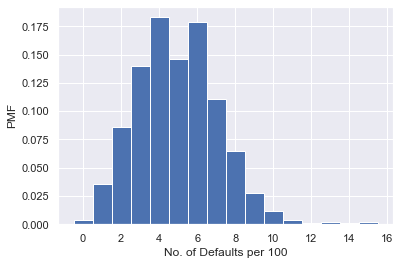

In [27]:
# Compute bin edges: bins
# bins centering on the integers
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5 # 0 is implied and can be omitted

# Generate histogram
plt.hist(n_defaults, density=True, bins=bins)

# Label axes
plt.xlabel('No. of Defaults per 100')
plt.ylabel('PMF')

# Show the plot
plt.show()

### Poissonville

### Relationship between Binomial and Poisson distributions
You just heard that the Poisson distribution is a limit of the Binomial distribution for rare events. This makes sense if you think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story we discussed in the video, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to np approximates a Binomial distribution for n Bernoulli trials with probability p of success (with n large and p small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

Let's explore these two distributions computationally. You will compute the mean and standard deviation of samples from a Poisson distribution with an arrival rate of 10. Then, you will compute the mean and standard deviation of samples from a Binomial distribution with parameters n and p such that np=10.

In [28]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, 10_000) # What is lambda

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [.5, .1, .01] # so that np is always 10


# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], 10_000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      9.9881 3.1578407797100856
n = 20 Binom: 10.0222 2.2492014494037655
n = 100 Binom: 10.0776 3.0122712759643675
n = 1000 Binom: 10.0481 3.1480130860592053


The means are all about the same, which can be shown to be true by doing some pen-and-paper work. The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability `p` gets lower and lower.

### How many no-hitters in a season?
In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games. The ECDF of the number of no-hitters in a season is shown to the right. 

**Q:** Which probability distribution would be appropriate to describe the number of no-hitters we would expect in a given season?

Note: The no-hitter data set was scraped and calculated from the data sets available at [retrosheet.org (license)](http://www.retrosheet.org/notice.txt).

**A:** Both Binomial and Poisson, though Poisson is easier to model and compute.

When we have rare events (low p, high n), the Binomial distribution is Poisson. This has a single parameter, the mean number of successes per time interval, in our case the mean number of no-hitters per season.

### Was 2015 anomalous?
1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

In [29]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, 10_000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0071


The result is about 0.007. This means that it is not that improbable to see a 7-or-more no-hitter season in a century. We have seen two in a century and a half, so it is not unreasonable.

### Normal PDF
In this exercise, you will explore the Normal PDF and also learn a way to plot a PDF of a known distribution using hacker statistics. Specifically, you will plot a Normal PDF for various values of the variance.

Draw 100,000 samples from a Normal distribution that has a mean of 20 and a standard deviation of 1. Do the same for Normal distributions with standard deviations of 3 and 10, each still with a mean of 20. Assign the results to samples_std1, samples_std3 and samples_std10, respectively.

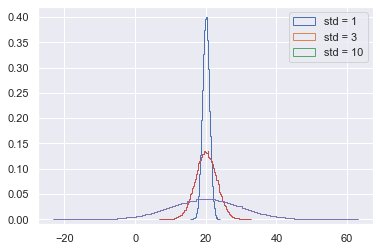

In [30]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, 100_000)
samples_std3 = np.random.normal(20, 3, 100_000)
samples_std10 = np.random.normal(20, 10, 100_000)

# Make histograms
for samples in [samples_std1, samples_std3, samples_std10]:
    _ = plt.hist(samples, bins=100, density=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.hist(samples_std3, bins=100, density=True, histtype='step')
_ = plt.hist(samples_std10, bins=100, density=True, histtype='step')
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

The different standard deviations result in PDFs of different widths. The peaks are all centered at the mean of 20.

### The Normal CDF
Now that you have a feel for how the Normal PDF looks, let's consider its CDF. Using the samples you generated in the last exercise (in your namespace as samples_std1, samples_std3, and samples_std10), generate and plot the CDFs.

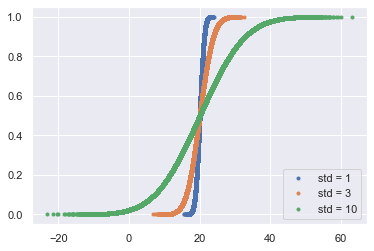

In [31]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

The CDFs all pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal. The width of the CDF varies with the standard deviation.

### Are the Belmont Stakes results Normally distributed?

Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. [Secretariat](https://en.wikipedia.org/wiki/Secretariat_(horse)) ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the np.random.normal() function and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?

Note: Justin scraped the data concerning the Belmont Stakes from the [Belmont Wikipedia page](https://en.wikipedia.org/wiki/Belmont_Stakes).

In [32]:
belmont_no_outliers = np.array([148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
    149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
    151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
    146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
    147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
    149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
    149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
    150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
    148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
    149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
    149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
    152.2 ])

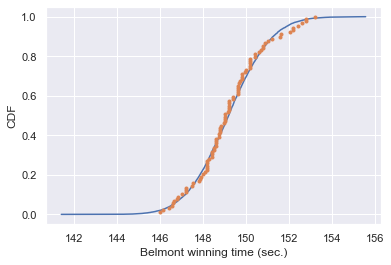

In [33]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, Normally distributed. This also suggests that in the last 100 years or so, there have not been major technological or training advances that have significantly affected the speed at which horses can run this race.

### What are the chances of a horse matching or beating Secretariat's record?
Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?

In [34]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, 1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples < 144) / 1000000

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000619


We had to take a million samples because the probability of a fast time is very low and we had to be sure to sample enough. We get that there is only a 0.06% chance of a horse running the Belmont as fast as Secretariat.

Note: The Exponential distribution describes the waiting times between rare events

### If you have a story, you can simulate it!
Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

Now, you will write a function to sample out of the distribution described by this story.

In [35]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

### Distribution of no-hitters and cycles
Now, you'll use your sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

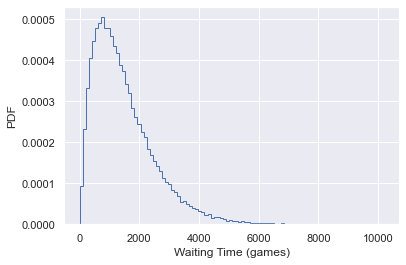

In [36]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, 100000)

# Make the histogram
_ = plt.hist(waiting_times, bins=100, density=True, histtype='step')

# Label axes
_ = plt.xlabel('Waiting Time (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

Notice that the PDF is peaked, unlike the waiting time for a single Poisson process. For fun (and enlightenment), I encourage you to also plot the CDF.

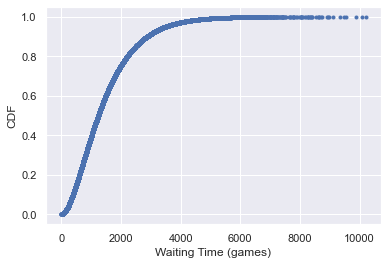

In [37]:
x, y = ecdf(waiting_times)

_ = plt.plot(x, y, marker='.', linestyle='none')

# Label axes
_ = plt.xlabel('Waiting Time (games)')
_ = plt.ylabel('CDF')

plt.show()

---

Waiting for the next Secretariat

Unfortunately, Justin was not alive when Secretariat ran the Belmont in 1973. Do you think he will get to see a performance like that? To answer this, you are interested in how many years you would expect to wait until you see another performance like Secretariat's. How is the waiting time until the next performance as good or better than Secretariat's distributed? Choose the best answer.

Exponential: A horse as fast as Secretariat is a rare event, which can be modeled as a Poisson process, and the waiting time between arrivals of a Poisson process is Exponentially distributed.

## 5. Parameter estimation by optimization<a id="5"/>

In [11]:
import pandas as pd
df = pd.read_csv('data2/mlb_nohitters.csv')

In [10]:
df

,date,game_number,winning_team,losing_team,winning_pitcher
0,18760715,140,NaN,NaN,NaN
1,18800612,1035,NaN,NaN,NaN
2,18800617,1046,NaN,NaN,NaN
3,18800819,1177,NaN,NaN,NaN
4,18800820,1179,NaN,NaN,NaN
...,...,...,...,...,...
289,20150725,210250,PHI,CHN,Cole Hamels
290,20150812,210490,SEA,BAL,Hisashi Iwakuma
291,20150821,210610,HOU,LAN,Michael Fiers
292,20150830,210740,CHN,LAN,Jake Arrieta


In [58]:
nohitter_times = df.loc[df.date >= 1900000, 'game_number'].diff() - 1
nohitter_times = nohitter_times[1:].values

In [59]:
nohitter_times = nohitter_times.astype('int16')

In [60]:
nohitter_times.dtype

dtype('int16')

### How often do we get no-hitters?
The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array `nohitter_times`.

If you assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed. As you have seen, the Exponential distribution has a single parameter, which we will call τ, the typical interval time. The value of the parameter τ that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters.

Compute the value of this parameter from the data. Then, use `np.random.exponential()` to "repeat" the history of Major League Baseball by drawing inter-no-hitter times from an exponential distribution with the τ you found and plot the histogram as an approximation to the PDF.

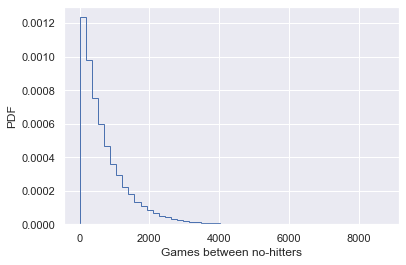

In [69]:
# Seed random number generator
#np.random.seed(42)

# Compute mean no-hitter time: tau
tau = nohitter_times.mean()

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time, bins=50, density=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

We see the typical shape of the Exponential distribution, going from a maximum at 0 and decaying to the right.

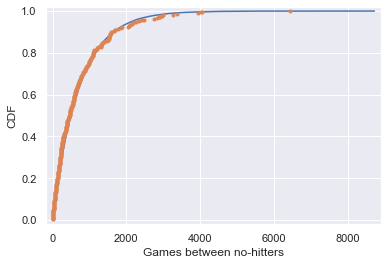

In [72]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

### 6. Generating bootstrap replicates<a id='6'/>

Bootstrapping
The use of resampled data to perform statistical inference

Bootstrap sample
A resampled array of the data

Bootstrap replicate
A statistic computed from a resampled array

Resampling engine: `np.random.choice()`

Generating bootstrap replicates


### Visualizing bootstrap samples

In this exercise, you will generate bootstrap samples from the set of annual rainfall data measured at the Sheffield Weather Station in the UK from 1883 to 2015. The data are stored in the NumPy array `rainfall` in units of millimeters (mm). By graphically displaying the bootstrap samples with an ECDF, you can get a feel for how bootstrap sampling allows probabilistic descriptions of data.

In [126]:
sheffield_station = pd.read_fwf('data2/sheffield_weather_station.csv', skiprows=8)
rainfall = sheffield_station.rain.values

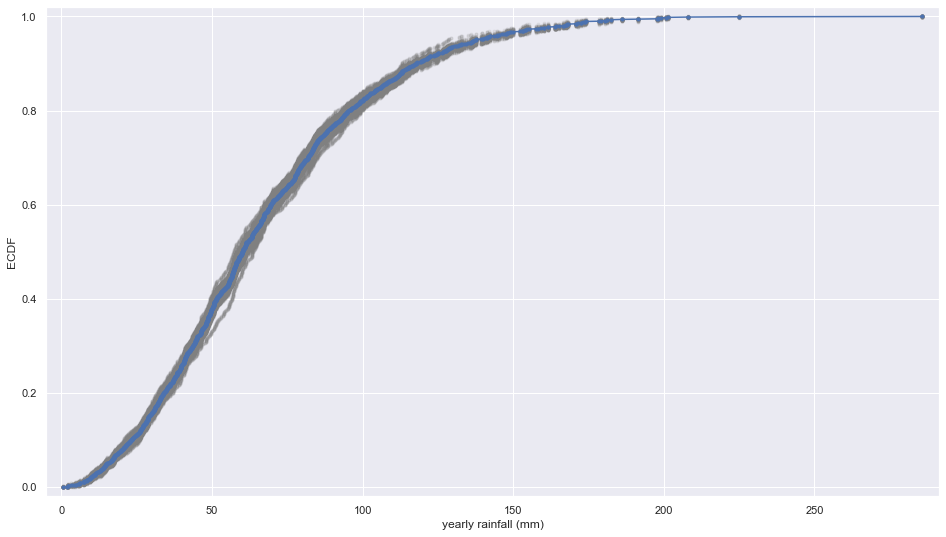

In [133]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none', color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

In [134]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [136]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

0.9488593574676786
0.9480135882278566


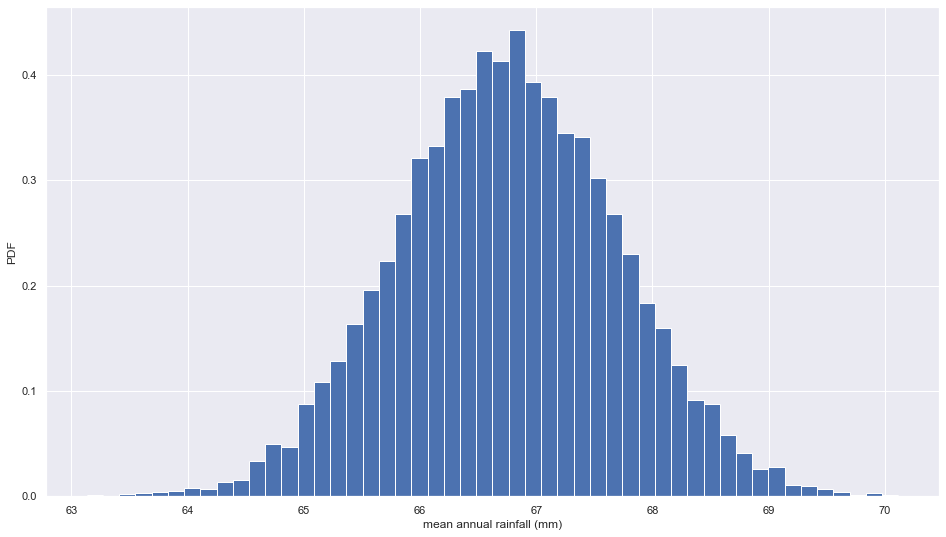

In [138]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, 10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

Anscombe's quartets

In [141]:
ascombe = pd.read_csv('data2/anscombe.csv', skiprows=1)
ascombe

,x,y,x.1,y.1,x.2,y.2,x.3,y.3
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91
